# Logistic Regression
Logistic Regression is also called as Logi Regression. It is commonly used to estimate the probability that an instace belongs to a particular class.
If the estimated probability is greater than 50% then the model predicts that the instance belongs to the class or else it predicts that it does not.

## Estimating Probabilities

Logistic Regression model computes a weighted sum of the input features but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result

$$ \dot{p} = h_{\theta}(x) = \sigma(\theta^T . X)$$

$\sigma(.)$ is a signoid function that outputs a number between 0 and 1.

$$\sigma(t) = \frac{1}{1+e^{-t}}$$

Once the Logistic Regression model has estimated the probability   $\dot{p} = h_{\theta}(x)$  that an instance x belongs to the positive class, it can make its prediction $\dot{y}$ easily.

$\dot{y}$ = 0 if p < 0.5, <br>
$\dot{y}$ = 1 if p > 0.5,

 




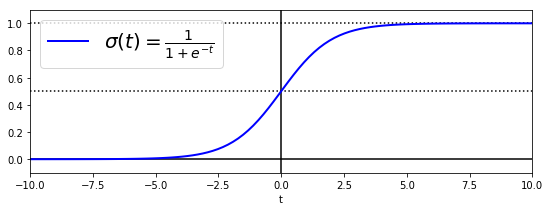

In [25]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

## Training and Cost Function :

The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances and low probability for negative instances. 

$$J(\theta) = - \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(p^{i}) + (1-y^{(i)})log(1-p^{(i)})]$$

There is no closed form equation to compute the value of $\theta$ that minimizes this cost function. But cost function is convex, so Gradient Descent is guaranteed to find the global minimum.

The partial derivatives of the cost function with reagrd to jth model parameter $\theta_j$

$$\frac{\partial}{\partial\theta_j} = 
            \frac{1}{m} \sum_{i=1}^m 
                (\sigma(\theta^T.x^{(i)}) - y^{(i)})x_j^{(i)}$$
                
                
This equation for each instance it computes the prediction error and multiplies it by the $j^{th}$ feature value, and then it compulates the average over all training instances. Once we have gradient vector containing all the partial derivatives you can use it in the Batch Gradient Descent algorithm. 

## Decision Boundaries 

Now I am going to use iris datset to illustarte Logistic Regression. This famous dataset contains the sepal and petal length and width of the 150 iris flowers of three different spices : Iris-Setosa, Iris-Veriscolor and Iris- Virginica.

__Task__ : Now building a classifier to detect the Iris-Viriginica type based on the petal width feature.


In [26]:

iris = datasets.load_iris()
list(iris.keys())


['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [27]:
X = iris["data"][:,3:] # Petal Width
y = (iris["target"] == 2).astype(np.int) #1 Iris-Virginica else 0

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

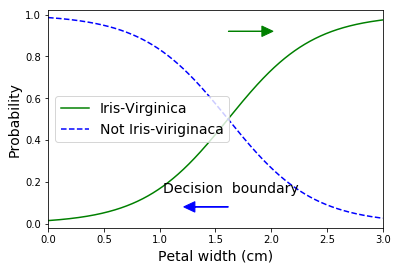

In [33]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_prob[:, 1] >= 0.5][0]

plt.plot(X_new,y_prob[:,1],"g-",label = 'Iris-Virginica')
plt.plot(X_new,y_prob[:,0], "b--",label = "Not Iris-viriginaca")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [34]:
decision_boundary

array([1.61561562])